### Case study 3: Auto Dataset

#### 4 Data Preparation: Handling Missing Values and labeling


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from scipy.spatial.distance import euclidean
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [5]:
cars = pd.read_csv('/Users/danielnickas/Downloads/QTM347/QTM347/HW_2/auto+mpg/auto-mpg.data-original', delim_whitespace=True, header=None)
cars.replace('?', np.nan, inplace=True)
cars.dropna(inplace=True)
cars.reset_index(drop=True, inplace=True)
print(cars.head(5))
print(missing_values := cars.isnull().sum())

      0    1      2      3       4     5     6    7                          8
0  18.0  8.0  307.0  130.0  3504.0  12.0  70.0  1.0  chevrolet chevelle malibu
1  15.0  8.0  350.0  165.0  3693.0  11.5  70.0  1.0          buick skylark 320
2  18.0  8.0  318.0  150.0  3436.0  11.0  70.0  1.0         plymouth satellite
3  16.0  8.0  304.0  150.0  3433.0  12.0  70.0  1.0              amc rebel sst
4  17.0  8.0  302.0  140.0  3449.0  10.5  70.0  1.0                ford torino
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


I see that the dataset doesn't have proper headers, so I will add them manually:

 Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete (1. American, 2. European, 3. Japanese)
    9. car name:      string (unique for each instance)

Missing Attribute Values:  horsepower has 6 missing values, but have gotten rid of them

In [6]:
# adding column names and identifying origin as categorical variable
cars.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
cars['origin'] = cars['origin'].astype('category')
print(cars.head(20))

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   18.0        8.0         307.0       130.0  3504.0          12.0   
1   15.0        8.0         350.0       165.0  3693.0          11.5   
2   18.0        8.0         318.0       150.0  3436.0          11.0   
3   16.0        8.0         304.0       150.0  3433.0          12.0   
4   17.0        8.0         302.0       140.0  3449.0          10.5   
5   15.0        8.0         429.0       198.0  4341.0          10.0   
6   14.0        8.0         454.0       220.0  4354.0           9.0   
7   14.0        8.0         440.0       215.0  4312.0           8.5   
8   14.0        8.0         455.0       225.0  4425.0          10.0   
9   15.0        8.0         390.0       190.0  3850.0           8.5   
10  15.0        8.0         383.0       170.0  3563.0          10.0   
11  14.0        8.0         340.0       160.0  3609.0           8.0   
12  15.0        8.0         400.0       150.0  3761.0           9.5   
13  14

#### 4.1 EDA

In [7]:
# Basic dataset information
print("Dataset Shape:", cars.shape)
print("\nDataset Info:")
print(cars.info())
print("\nData Types:")
print(cars.dtypes)

Dataset Shape: (392, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    float64 
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    float64 
 5   acceleration  392 non-null    float64 
 6   model_year    392 non-null    float64 
 7   origin        392 non-null    category
 8   car_name      392 non-null    object  
dtypes: category(1), float64(7), object(1)
memory usage: 25.1+ KB
None

Data Types:
mpg              float64
cylinders        float64
displacement     float64
horsepower       float64
weight           float64
acceleration     float64
model_year       float64
origin          category
car_name          object
dtype: object


In [8]:
# Summary statistics for numerical variables
print("Summary Statistics for Numerical Variables:")
print("="*50)
numerical_vars = cars.select_dtypes(include=[np.number]).columns
print(cars[numerical_vars].describe())

Summary Statistics for Numerical Variables:
              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    392.000000  392.000000  
mean      15.541327   75.979592  
std        2.758864    3.683737  
min        8.000000   70.000000  
25%       13.775000   73.000000  
50%       15.500000   76.000000  
75%       17.025000   79.000000  
max       24.800000   82.000000  


In [9]:
# Distribution of categorical variables
print("\nCategorical Variable Distributions:")
print("="*50)
print("Origin Distribution:")
print(cars['origin'].value_counts())
print("\nModel Year Distribution:")
print(cars['model_year'].value_counts().sort_index())
print("\nCylinders Distribution:")
print(cars['cylinders'].value_counts().sort_index())


Categorical Variable Distributions:
Origin Distribution:
origin
1.0    245
3.0     79
2.0     68
Name: count, dtype: int64

Model Year Distribution:
model_year
70.0    29
71.0    27
72.0    28
73.0    40
74.0    26
75.0    30
76.0    34
77.0    28
78.0    36
79.0    29
80.0    27
81.0    28
82.0    30
Name: count, dtype: int64

Cylinders Distribution:
cylinders
3.0      4
4.0    199
5.0      3
6.0     83
8.0    103
Name: count, dtype: int64


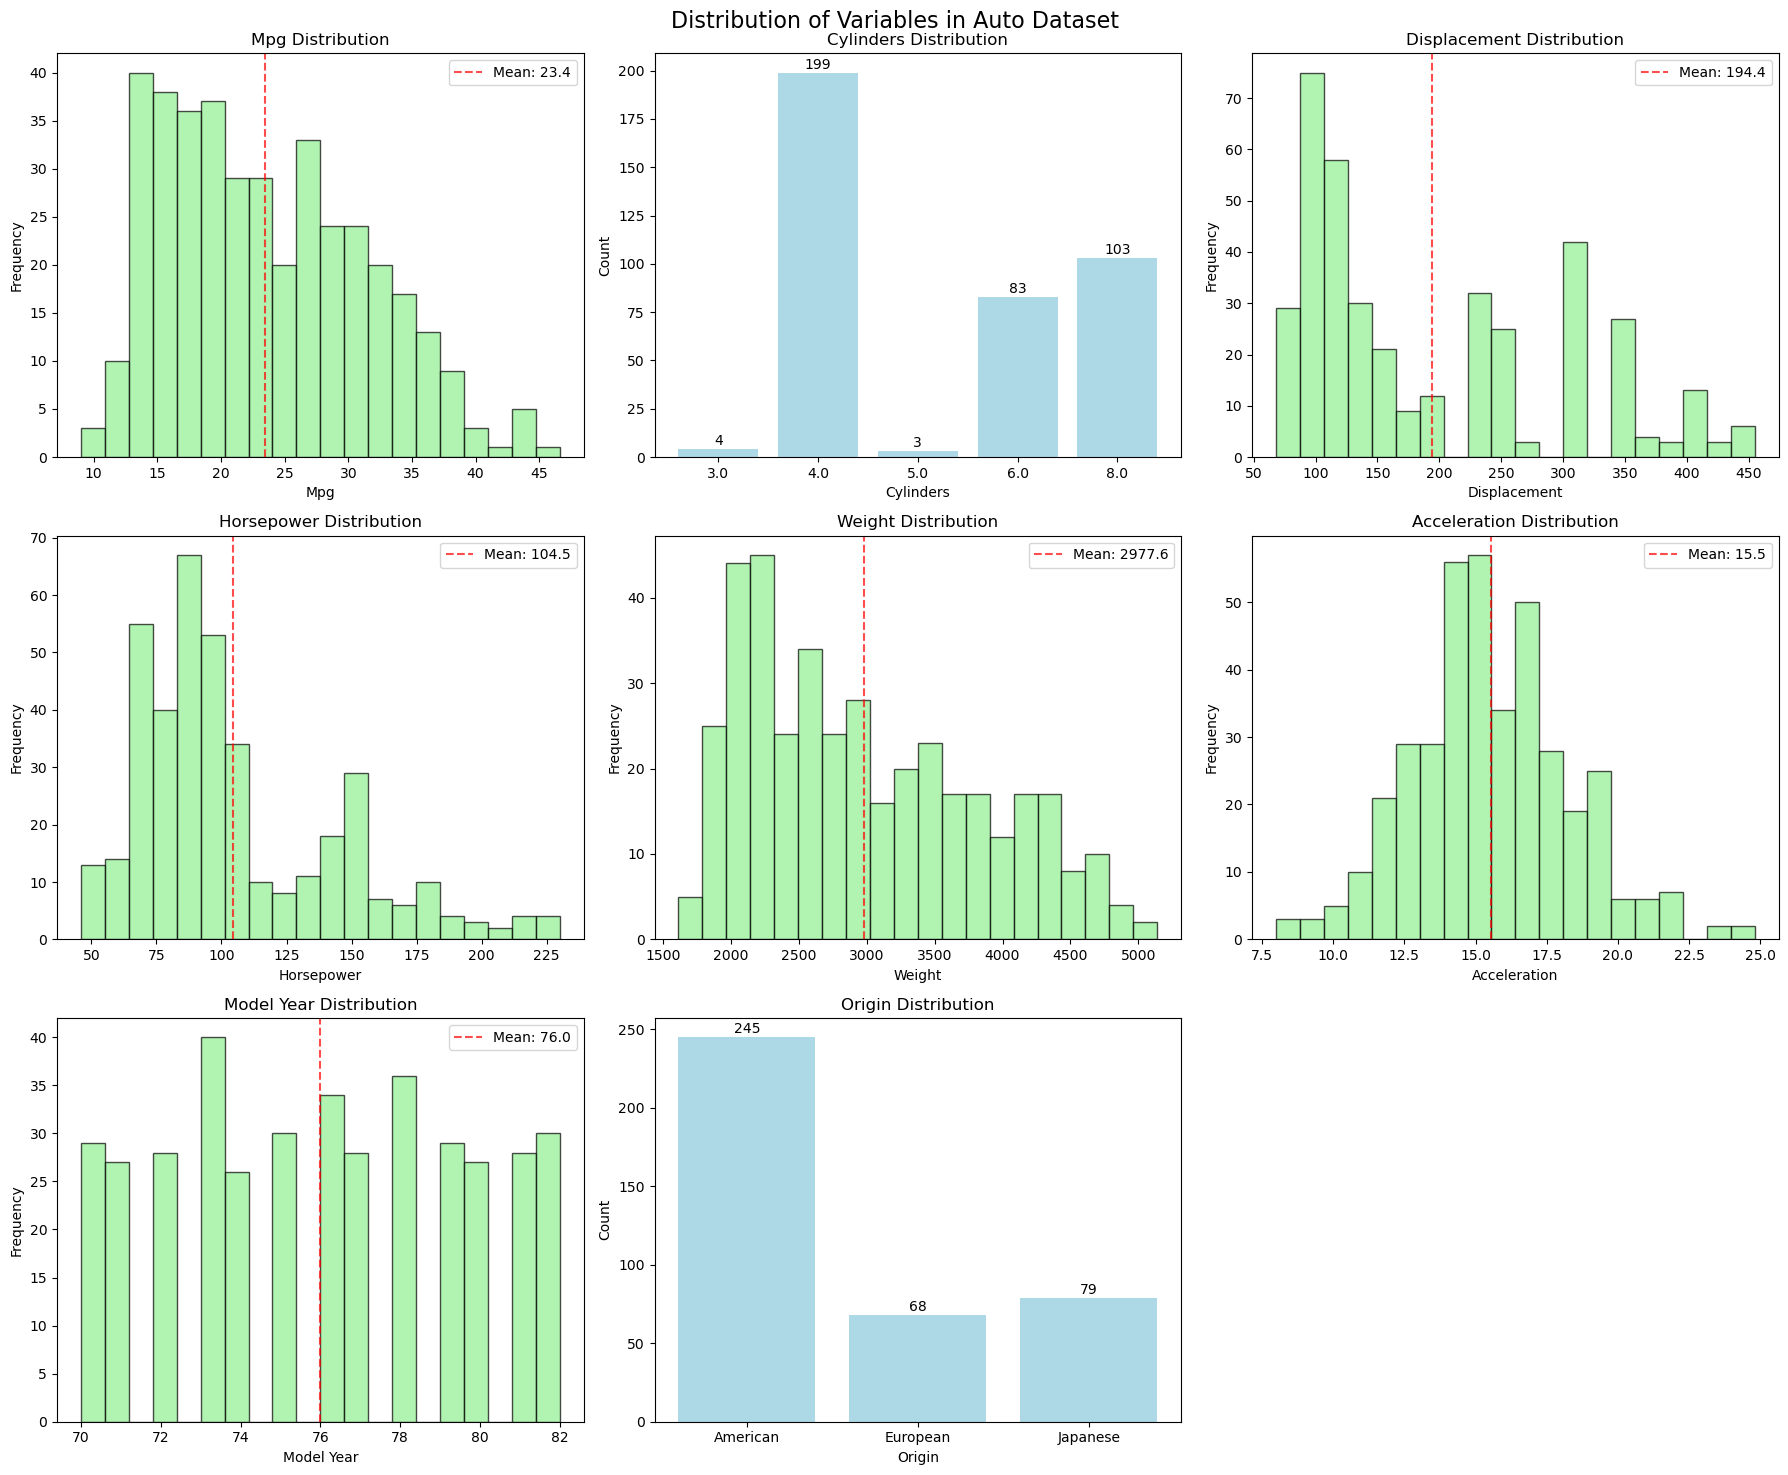


Summary Statistics for Each Variable:

MPG:
  - Mean: 23.45
  - Std: 7.81
  - Min: 9.00
  - Max: 46.60
  - Skewness: 0.46

CYLINDERS:
  - Value counts:
    3.0: 4 (1.0%)
    4.0: 199 (50.8%)
    5.0: 3 (0.8%)
    6.0: 83 (21.2%)
    8.0: 103 (26.3%)

DISPLACEMENT:
  - Mean: 194.41
  - Std: 104.64
  - Min: 68.00
  - Max: 455.00
  - Skewness: 0.70

HORSEPOWER:
  - Mean: 104.47
  - Std: 38.49
  - Min: 46.00
  - Max: 230.00
  - Skewness: 1.09

WEIGHT:
  - Mean: 2977.58
  - Std: 849.40
  - Min: 1613.00
  - Max: 5140.00
  - Skewness: 0.52

ACCELERATION:
  - Mean: 15.54
  - Std: 2.76
  - Min: 8.00
  - Max: 24.80
  - Skewness: 0.29

MODEL_YEAR:
  - Mean: 75.98
  - Std: 3.68
  - Min: 70.00
  - Max: 82.00
  - Skewness: 0.02

ORIGIN:
  - Value counts:
    1.0 (American): 245 (62.5%)
    2.0 (European): 68 (17.3%)
    3.0 (Japanese): 79 (20.2%)


In [10]:
# Create histograms for 8 meaningful variables (excluding car names)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Distribution of Variables in Auto Dataset', fontsize=16, y=0.98)

# List of meaningful columns (excluding car_name)
all_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']

# Create histograms for each variable
for i, col in enumerate(all_columns):
    row = i // 3
    col_idx = i % 3
    ax = axes[row, col_idx]
    
    if col in ['origin', 'cylinders']:
        # For categorical variables, use count plot
        value_counts = cars[col].value_counts().sort_index()
        
        if col == 'origin':
            # creating custom labels for origin histogram...labeling
            origin_labels = {1: 'American', 2: 'European', 3: 'Japanese'}
            labels = [origin_labels[int(x)] for x in value_counts.index]
            ax.bar(labels, value_counts.values, color='lightblue')
        else:
            ax.bar(value_counts.index.astype(str), value_counts.values, color='lightblue')
        
        ax.set_title(f'{col.replace("_", " ").title()} Distribution')
        ax.set_xlabel(col.replace("_", " ").title())
        ax.set_ylabel('Count')
        
        # Add value labels on bars
        for j, v in enumerate(value_counts.values):
            ax.text(j, v + 0.5, str(v), ha='center', va='bottom')
    else:
        # For continuous variables, use regular histogram
        ax.hist(cars[col], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
        ax.set_title(f'{col.replace("_", " ").title()} Distribution')
        ax.set_xlabel(col.replace("_", " ").title())
        ax.set_ylabel('Frequency')
        
        # Add basic statistics as text
        mean_val = cars[col].mean()
        std_val = cars[col].std()
        ax.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.1f}')
        ax.legend()

# Hide the empty subplot (9th position)
axes[2, 2].set_visible(False)

plt.tight_layout()
plt.show()

# Print summary statistics for each variable (excluding car names)
print("\nSummary Statistics for Each Variable:")
print("="*60)
for col in all_columns:
    print(f"\n{col.upper()}:")
    if cars[col].dtype == 'object' or col in ['origin', 'cylinders']:
        print(f"  - Value counts:")
        if col == 'origin':
            # Add descriptive labels for origin in summary statistics
            origin_labels = {1: 'American', 2: 'European', 3: 'Japanese'}
            for value, count in cars[col].value_counts().sort_index().items():
                label = origin_labels[int(value)]
                print(f"    {value} ({label}): {count} ({count/len(cars)*100:.1f}%)")
        else:
            for value, count in cars[col].value_counts().sort_index().items():
                print(f"    {value}: {count} ({count/len(cars)*100:.1f}%)")
    else:
        print(f"  - Mean: {cars[col].mean():.2f}")
        print(f"  - Std: {cars[col].std():.2f}")
        print(f"  - Min: {cars[col].min():.2f}")
        print(f"  - Max: {cars[col].max():.2f}")
        print(f"  - Skewness: {cars[col].skew():.2f}")

We've checked the basic statistics for the columns except for unique name of model. Below are pairwise plots that show one-to-one variable comparisons:
- MPG (Miles Per Gallon) vs Horsepower
- MPG vs Origin
- MPG vs Number of Cylinders (relating to a model's engine)

We are most interested in MPG (efficiency of vehicles) as our dependent variable, and cylinders, horsepower, and origin as independent variables. From review of the data, it appears that the distribution of mpg is mildly left-skewed, which may limit our statistical inference given that linear regression (which will be used later to determine relationships and correlation) relies on the normality of the data. In addition, it appears that the number of cylinders and horsepower are negatively correlated with mpg, and that American cars have the worst mileage per gallon, followed by European cars and then Japanese cars. 

Given some historical knowledge, it is not surprising that American cars have the worst mpg, as they are often larger vehicles with bigger engines. European cars are often smaller and more fuel-efficient addressing the needs of Europeans, while Japanese cars are known for their compact size and fuel efficiency. One can make comparisons to the way American, European, and Japanese cities are structured, with American cities often being more spread out and car-dependent, while European and Japanese cities often have better public transportation and are more walkable。


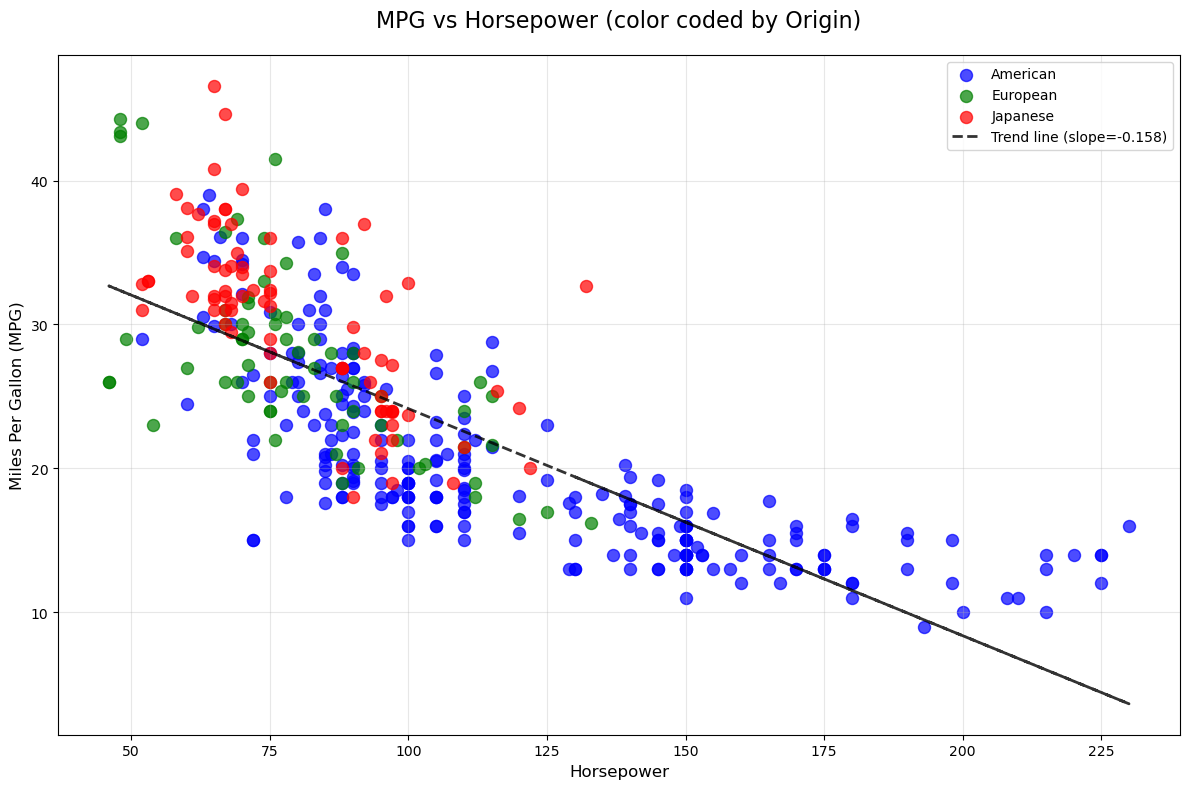

MPG vs Horsepower Analysis:
Correlation coefficient: -0.778
R-squared: 0.606

MPG statistics by origin:
American: Mean MPG = 20.0, Mean HP = 119.0
European: Mean MPG = 27.6, Mean HP = 80.6
Japanese: Mean MPG = 30.5, Mean HP = 79.8

Overall: Mean MPG = 23.4, Mean HP = 104.5


In [11]:
# MPG vs. Horsepower scatter plot
plt.figure(figsize=(12, 8))

# create scatter plot with origin as color coding
origin_labels = {1: 'American', 2: 'European', 3: 'Japanese'}
origin_colors = {1: 'blue', 2: 'green', 3: 'red'}

for origin in [1, 2, 3]:
    origin_data = cars[cars['origin'] == origin]
    plt.scatter(origin_data['horsepower'], origin_data['mpg'], 
               c=origin_colors[origin], alpha=0.7, s=75,
               label=origin_labels[origin])

plt.xlabel('Horsepower', fontsize=12)
plt.ylabel('Miles Per Gallon (MPG)', fontsize=12)
plt.title('MPG vs Horsepower (color coded by Origin)', fontsize=16, pad=20)
plt.legend()
plt.grid(True, alpha=0.3)

# adding a trend line
z = np.polyfit(cars['horsepower'], cars['mpg'], 1)
p = np.poly1d(z)
plt.plot(cars['horsepower'], p(cars['horsepower']), "k--", alpha=0.8, linewidth=2, label=f'Trend line (slope={z[0]:.3f})')
plt.legend()

plt.tight_layout()
plt.show()

# printing correlation and some basic statistics 
print("MPG vs Horsepower Analysis:")
print("="*40)
correlation = cars['mpg'].corr(cars['horsepower'])
print(f"Correlation coefficient: {correlation:.3f}")
print(f"R-squared: {correlation**2:.3f}")

print("\nMPG statistics by origin:")
for origin in [1, 2, 3]:
    origin_data = cars[cars['origin'] == origin]
    print(f"{origin_labels[origin]}: Mean MPG = {origin_data['mpg'].mean():.1f}, Mean HP = {origin_data['horsepower'].mean():.1f}")

print(f"\nOverall: Mean MPG = {cars['mpg'].mean():.1f}, Mean HP = {cars['horsepower'].mean():.1f}")

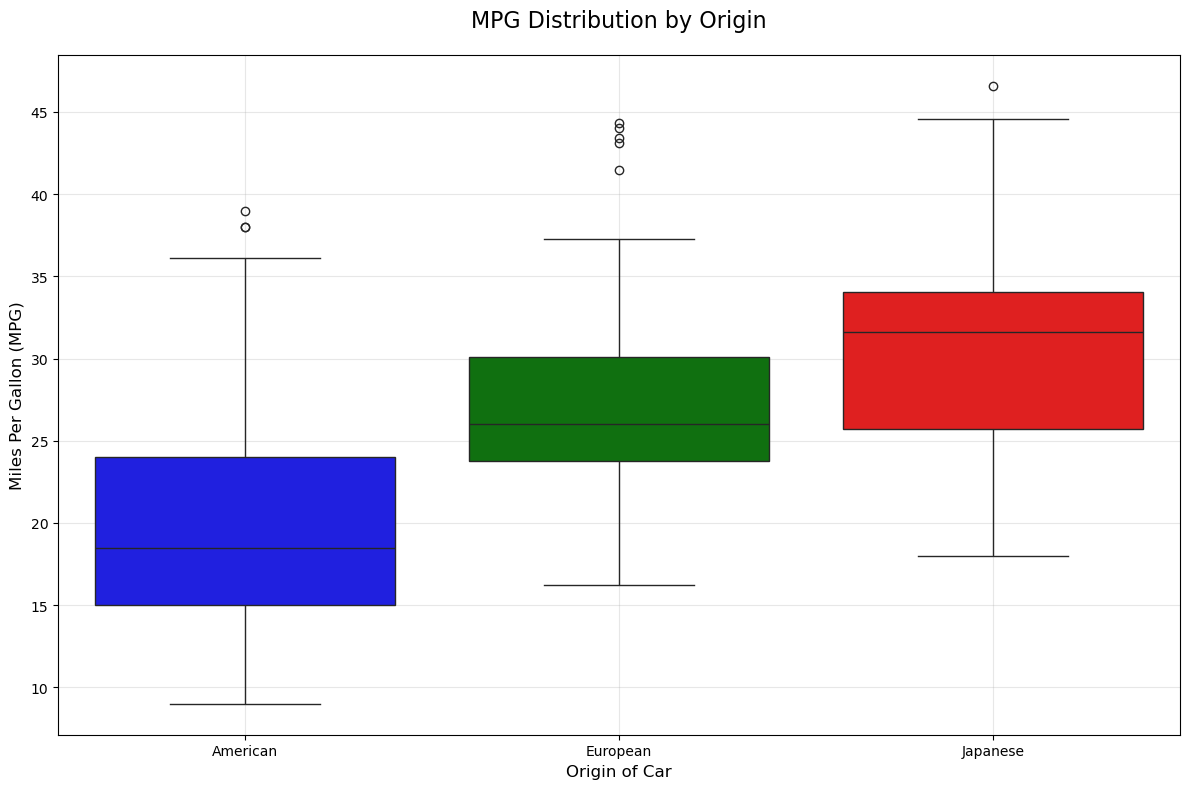

MPG by Origin Analysis
               count   mean   std   min    25%   50%    75%   max
origin_labels                                                    
American       245.0  20.03  6.44   9.0  15.00  18.5  24.00  39.0
European        68.0  27.60  6.58  16.2  23.75  26.0  30.12  44.3
Japanese        79.0  30.45  6.09  18.0  25.70  31.6  34.05  46.6

Mean MPG by Origin:
American: 20.0 ± 6.4 MPG
European: 27.6 ± 6.6 MPG
Japanese: 30.5 ± 6.1 MPG


In [12]:
# creating a plot to examine MPG vs. Origin 
plt.figure(figsize=(12, 8))

# box plot
origin_labels = {1: 'American', 2: 'European', 3: 'Japanese'}
cars['origin_labels'] = cars['origin'].map(origin_labels)
sns.boxplot(data=cars, x='origin_labels', y='mpg', palette=['blue', 'green', 'red'])
plt.title('MPG Distribution by Origin', fontsize=16, pad=20)
plt.xlabel('Origin of Car', fontsize=12)
plt.ylabel('Miles Per Gallon (MPG)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# printing basic stats
print("MPG by Origin Analysis")
# stats by car origin
mpg_stats = cars.groupby('origin_labels')['mpg'].describe()
print(mpg_stats.round(2))

print("\nMean MPG by Origin:")
for origin in [1, 2, 3]:
    origin_data = cars[cars['origin'] == origin]
    mean_mpg = origin_data['mpg'].mean()
    std_mpg = origin_data['mpg'].std()
    print(f"{origin_labels[origin]}: {mean_mpg:.1f} ± {std_mpg:.1f} MPG")


MPG by Number of Cylinders Analysis
           count   mean   std   min    25%    50%    75%   max
cylinders                                                     
3.0          4.0  20.55  2.56  18.0  18.75  20.25  22.05  23.7
4.0        199.0  29.28  5.67  18.0  25.00  28.40  32.95  46.6
5.0          3.0  27.37  8.23  20.3  22.85  25.40  30.90  36.4
6.0         83.0  19.97  3.83  15.0  18.00  19.00  21.00  38.0
8.0        103.0  14.96  2.84   9.0  13.00  14.00  16.00  26.6

Mean MPG by Number of Cylinders:
3.0 cylinders: 20.6 ± 2.6 MPG (n=4)
4.0 cylinders: 29.3 ± 5.7 MPG (n=199)
5.0 cylinders: 27.4 ± 8.2 MPG (n=3)
6.0 cylinders: 20.0 ± 3.8 MPG (n=83)
8.0 cylinders: 15.0 ± 2.8 MPG (n=103)


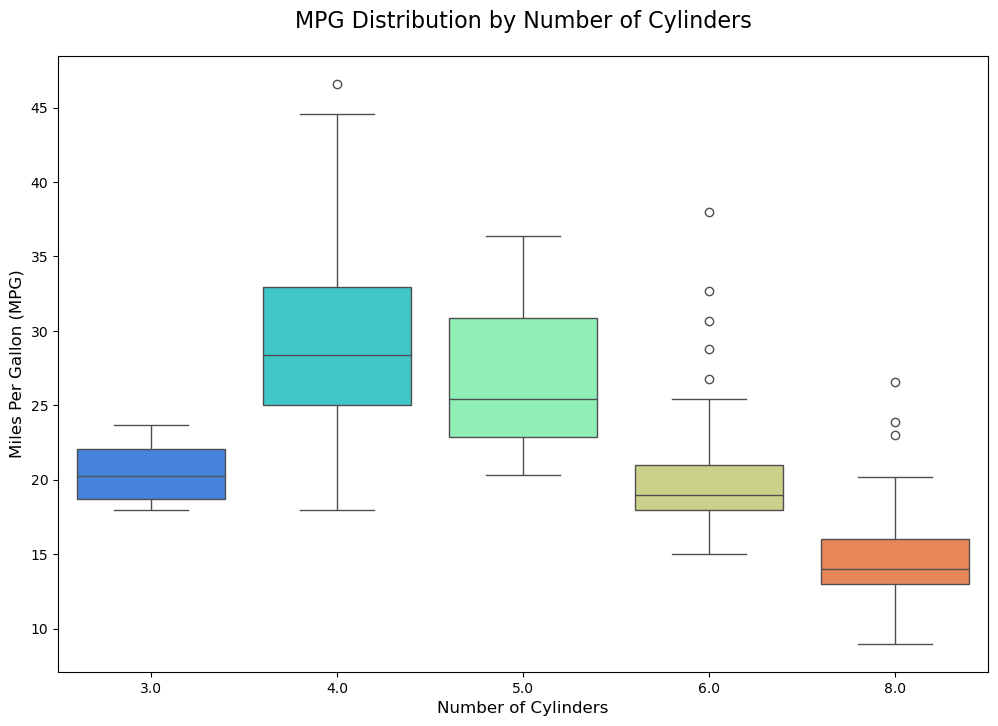

In [13]:
# MPG by Number of Cylinders Analysis
plt.figure(figsize=(12, 8))

# Create box plot for MPG by Cylinders
sns.boxplot(data=cars, x='cylinders', y='mpg', palette='rainbow')
plt.title('MPG Distribution by Number of Cylinders', fontsize=16, pad=20)
plt.xlabel('Number of Cylinders', fontsize=12)
plt.ylabel('Miles Per Gallon (MPG)', fontsize=12)

# some stats
print("MPG by Number of Cylinders Analysis")
mpg_by_cylinders = cars.groupby('cylinders')['mpg'].describe()
print(mpg_by_cylinders.round(2))

print("\nMean MPG by Number of Cylinders:")
for cylinder in sorted(cars['cylinders'].unique()):
    cylinder_data = cars[cars['cylinders'] == cylinder]
    mean_mpg = cylinder_data['mpg'].mean()
    std_mpg = cylinder_data['mpg'].std()
    count = len(cylinder_data)
    print(f"{cylinder} cylinders: {mean_mpg:.1f} ± {std_mpg:.1f} MPG (n={count})")


#### 4.2 How has time factored into MPG? 
We know MPG has generally improved over time due to advancements in technology and changes in consumer preferences, so we will look at how MPG has changed over the years in the dataset. Is there a trend?

##### 4.2 a) Starting with a simple regression of mpg vs. year 
Reporting the summary output. Is year a significant vari-able at the .05 level? State what effect year has on mpg, if any, according to this model.

Per the results of the below linear regression, year is a significant variable at the .05 level. The results show that, for every increase in the year a car was produced, its miles per gallon increased 1.23 on average.

In [14]:
model_year_ols = smf.ols('mpg ~ model_year', data=cars).fit()
print(model_year_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     198.3
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           1.08e-36
Time:                        15:21:52   Log-Likelihood:                -1280.6
No. Observations:                 392   AIC:                             2565.
Df Residuals:                     390   BIC:                             2573.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -70.0117      6.645    -10.536      0.0

##### 4.2 b)
Add horsepower on top of the variable year to your linear model. Is year still a significant
variable at the .05 level? Give a precise interpretation of the year’s effect found here

While model year remains a statistically significant correlate of mpg, its magnitude decreased somewhat. After controlling for horsepower and holding it fixed, we find that for every increase in the year a car was produced, its miles per gallon increased around 0.66 on average.

In [15]:
model_year_ols_2 = smf.ols('mpg ~ model_year + horsepower', data=cars).fit()
print(model_year_ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     423.9
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           1.94e-98
Time:                        15:21:52   Log-Likelihood:                -1134.5
No. Observations:                 392   AIC:                             2275.
Df Residuals:                     389   BIC:                             2287.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.7392      5.349     -2.382      0.0

##### 4.2 c)
The two 95% CI’s for the coefficient of year differ among (i) and (ii). How would you explain
the difference to a non-statistician?

The confidence interval (CI) for the coefficient of year in the first model (1) is wider than in the second model (2). This is because the first model does not account for horsepower, which is a relevant variable that affects mpg. Typically cars with greater horsepower are less fuel efficient. By including horsepower in the second model, we are able to better isolate the effect of year on mpg, leading to a more precise estimate and a narrower confidence interval.

The reduction in the confidence interval width when including horsepower suggests that the two variables are correlated. By controlling for horsepower, we reduce the residual variance in the model, leading to more precise estimates of the effect of year on mpg. This illustrates the importance of including relevant predictors in regression models to avoid omitted variable bias. 

In [16]:
# Compare 95% confidence intervals for model_year between two models
# Model 1: mpg ~ model_year  (already fit as model_year_ols)
# Model 2: mpg ~ model_year + horsepower (already fit as model_year_ols_2)

import pandas as pd
from math import sqrt

# Extract CIs
ci1 = model_year_ols.conf_int().loc['model_year']
ci2 = model_year_ols_2.conf_int().loc['model_year']

beta1 = model_year_ols.params['model_year']
se1 = model_year_ols.bse['model_year']

beta2 = model_year_ols_2.params['model_year']
se2 = model_year_ols_2.bse['model_year']

# Compute CI widths
width1 = ci1[1] - ci1[0]
width2 = ci2[1] - ci2[0]

# Manual reconstruction of the 95% CI using ~1.96 * SE (large sample approximation)
man_ci1_lower = beta1 - 1.96 * se1
man_ci1_upper = beta1 + 1.96 * se1
man_ci2_lower = beta2 - 1.96 * se2
man_ci2_upper = beta2 + 1.96 * se2

# Residual variance (Mean Squared Error) comparison
mse1 = (model_year_ols.resid @ model_year_ols.resid) / model_year_ols.df_resid
mse2 = (model_year_ols_2.resid @ model_year_ols_2.resid) / model_year_ols_2.df_resid

# Correlation between model_year and horsepower (to show why omitted horsepower inflates SE)
cor_year_hp = cars[['model_year','horsepower']].corr().loc['model_year','horsepower']

summary_table = pd.DataFrame({
    'Model': ['mpg ~ model_year', 'mpg ~ model_year + horsepower'],
    'Coefficient (year)': [beta1, beta2],
    'Std. Error': [se1, se2],
    '95% CI Lower': [ci1[0], ci2[0]],
    '95% CI Upper': [ci1[1], ci2[1]],
    'CI Width': [width1, width2],
    'MSE (Residual Var)': [mse1, mse2]
}).round(4)

print("Comparison of Year Coefficient Between Two Models")
print(summary_table.to_string(index=False))
print(f"Correlation(model_year, horsepower): {cor_year_hp:.4f}")
print("\nManual CI reconstruction check (should closely match above):")
print(f"Model 1 approx 95% CI: ({man_ci1_lower:.4f}, {man_ci1_upper:.4f})")
print(f"Model 2 approx 95% CI: ({man_ci2_lower:.4f}, {man_ci2_upper:.4f})")

Comparison of Year Coefficient Between Two Models
                        Model  Coefficient (year)  Std. Error  95% CI Lower  95% CI Upper  CI Width  MSE (Residual Var)
             mpg ~ model_year              1.2300      0.0874        1.0583        1.4018    0.3435             40.4906
mpg ~ model_year + horsepower              0.6573      0.0663        0.5270        0.7875    0.2606             19.2574
Correlation(model_year, horsepower): -0.4164

Manual CI reconstruction check (should closely match above):
Model 1 approx 95% CI: (1.0588, 1.4013)
Model 2 approx 95% CI: (0.5274, 0.7871)


##### 4.2 d)

Creating a model with interaction by fitting mpg ~ year * horsepower. Is the interaction
effect significant at .05 level? Explain the year effect (if any).

The interaction effect between year and horsepower is statistically significant at the .05 level, as indicated by the p-value of 0.000 in the regression output. This suggests that the relationship between year and mpg varies depending on the level of horsepower. Specifically, the negative coefficient for the interaction term (-0.016) indicates that as horsepower increases, the positive effect of year on mpg decreases. 

Key point: newer cars with higher horsepower tend to have lower mpg as compared to newer cars with lower horsepower. This finding highlights the relationship between vehicle efficiency, technological advancements over time, and engine power.


In [17]:
model_year_ols_3 = smf.ols('mpg ~ model_year * horsepower', data=cars).fit()
print(model_year_ols_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     392.5
Date:                Fri, 03 Oct 2025   Prob (F-statistic):          4.00e-117
Time:                        15:21:52   Log-Likelihood:                -1087.8
No. Observations:                 392   AIC:                             2184.
Df Residuals:                     388   BIC:                             2199.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -126.60

#### 4.3 Categorical Predictors

##### 4.3 a)

Fit a model that treats cylinders as a continuous/numeric variable. Is cylinders significant at
the 0.01 level? What effect does cylinders play in this model?

Reviewing the results from the regression of mpg on cylinders as a continuous variable, the number of cylinders is statistically significantly related (p < .01) to a car’s mileage per gallon. With a coefficient of -3.558, the number of cylinders is negatively related to the mpg. Specifically, increasing a car’s number of cylinders by 1 will decrease mpg by around 3.6 mpgs. 


In [21]:
model_cylinders_ols_lin = smf.ols('mpg ~ cylinders', data=cars).fit()
print(model_cylinders_ols_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     596.6
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           1.31e-80
Time:                        17:37:04   Log-Likelihood:                -1179.3
No. Observations:                 392   AIC:                             2363.
Df Residuals:                     390   BIC:                             2371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.9155      0.835     51.404      0.0

##### 4.3 b)

Fit a model that treats cylinders as a categorical. Is cylinders
significant at the .01 level? What is the effect of cylinders in this model? Describe the cylinders effect over mpg

Where cylinders is treated as a factor variable, a regression of mpg on cylinders includes an effect for each observed number of cylinders per the data set. Specifically, the average mpg for a car with 3 cylinders (the base level of cylinders per the data) is 20.550. The average mpg for a car with 4 cylinders is 29.284; average mpg for a car with 5 cylinders is 27.367, etc. 

The average mpg for cars with 4 cylinders is statistically significantly different (p < .01) from the average mpg for cars with 3 cylinders; however, the remaining average mpg levels are not statistically significantly different at the .01 level from the average mpg for cars with 3 cylinders.

In [22]:
cylinders_cat = cars['cylinders'].astype('category')
model_cylinders_ols_cat = smf.ols('mpg ~ cylinders_cat', data=cars).fit()
print(model_cylinders_ols_cat.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     173.0
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           8.79e-85
Time:                        17:37:13   Log-Likelihood:                -1160.3
No. Observations:                 392   AIC:                             2331.
Df Residuals:                     387   BIC:                             2350.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               20.5500 

##### 4.3 c)

What are the fundamental differences between treating cylinders as a continuous and cate-
gorical variable in your models?. 

When treating cylinders as a continuous variable, the model assumes a linear relationship between the number of cylinders and mpg. This means that each additional cylinder is assumed to have the same effect on mpg, regardless of the starting point. For example, increasing from 3 to 4 cylinders is assumed to have the same effect on mpg as increasing from 5 to 6 cylinders. This is not necessarly a realistic assumption, as the effect of adding cylinders may not be constant across all levels. It also doesn't make sense for a model to assume a car with 0 cylinders exists and has a certain mpg (42.9 in this case.)

When treating cylinders as a categorical variable, the model includes a separate effect for each observed number of cylinders. This allows for the possibility that the effect of adding cylinders on mpg may differ depending on the starting point (intercept of 20.5500). For example, the effect of going from 3 to 4 cylinders may be different from the effect of going from 5 to 6 cylinders. This approach can provide a more flexible and potentially more accurate representation of the relationship between cylinders and mpg.

##### 4.3 d)

Can you test the null hypothesis: fit0: mpg is linear in cylinders vs. fit1: mpg relates to cylinders as a categorical variable at .01 level? Use F-test or likelihood ratio test.

Using anova to test the results of the F-test, there is sufficient evidence to reject the null hypothesis that mpg is linear in cylinders at the .01 level as the differences in residual sum of squares between the two models are statistically significantly different.

In [23]:
anova_results = sm.stats.anova_lm(model_cylinders_ols_lin, model_cylinders_ols_cat)
print(anova_results)

alpha = 0.01
p_value = anova_results['Pr(>F)'][1]

if p_value < alpha:
    print("Reject H0: mpg is not linear in cylinders (categorical model fits significantly better)")
else:
    print("Fail to reject H0: mpg can be modeled linearly in cylinders")

   df_resid          ssr  df_diff     ss_diff         F        Pr(>F)
0     390.0  9415.910391      0.0         NaN       NaN           NaN
1     387.0  8544.486702      3.0  871.423689  13.15628  3.382665e-08
Reject H0: mpg is not linear in cylinders (categorical model fits significantly better)


#### 4.4 


##### 4.4 a) Final modeling question: 

We want to explore the effects of each feature as best as possible, so we have created a model that includes all features, treating cylinders, model year, and origin as categorical variables. We will also include interaction terms between horsepower and weight, as well as between model year and origin, to capture potential combined effects on mpg.

We regress mpg on year, cylinders (as factor, consistent with the above), displacement, weight, horsepower, and origin. The full model has a statistically significant F-test and explains a significant proportion of the variance within the data in adjusted R-squared (approximately 84.3%). Reviewing the plot of residuals, the model does not appear to satisfy the requirements of linearity or homoskedasticity.

In [26]:
origin_cat = cars['origin'].astype('category')
complete_model = smf.ols('mpg ~ model_year + cylinders_cat + displacement + weight + horsepower + origin_cat', data=cars).fit()
print(complete_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.7
Date:                Fri, 03 Oct 2025   Prob (F-statistic):          1.66e-148
Time:                        19:02:27   Log-Likelihood:                -993.39
No. Observations:                 392   AIC:                             2009.
Df Residuals:                     381   BIC:                             2052.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -21.6233 

#### 4.4 b)

Describe the final model. Include diagnostic plots with particular focus on the model residuals and diagnoses using matplotlib and scipy.stats.

Model specification
- Formula: mpg ~ model_year + cylinders_cat + displacement + weight + horsepower + origin_cat
- Encodings: cylinders_cat and origin_cat are categorical (treatment/dummy coded).
- Baselines: By default, the first category is the reference (here, cylinders=3 and origin=American) and the intercept represents their mean MPG when numeric covariates are zero.

The residual model diagnostics indicate that the model does not satisfy the assumptions of linear regression as well as we would hope. The residuals vs. fitted plot shows a non-linear pattern, suggesting that the relationship between predictors and mpg is not fully captured by the linear terms. Additionally, the spread of residuals increases with fitted values, indicating heteroscedasticity (non-constant variance).

However, the use of a non-linear regression model (like a Tobit which accounts for the censored nature of mpg) and heteroscedasticity-robust standard errors could correct for these issues. Using the Q-Q plot, makes it clear that the normality requirement is not met, as the plot indicates that there are significant outliers in the right tail of the data. 


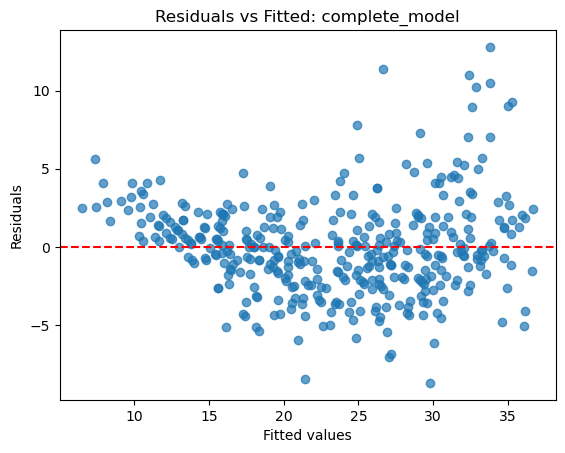

In [27]:
# Residuals vs Fitted plot for complete_model
plt.scatter(complete_model.fittedvalues, complete_model.resid, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted: complete_model')
plt.show()

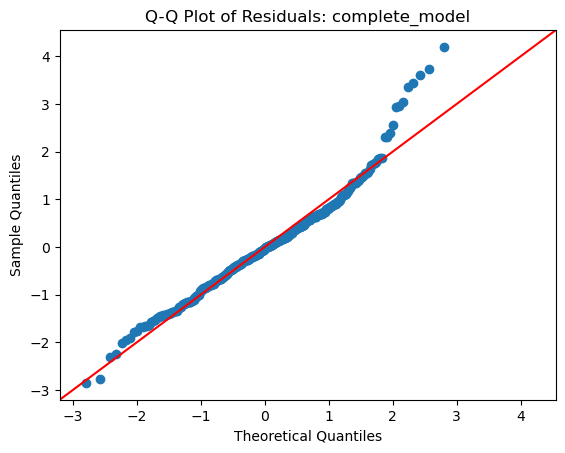

In [28]:
# Q-Q plot of residuals for complete_model
sm.qqplot(complete_model.resid, line='45', fit=True)
plt.title('Q-Q Plot of Residuals: complete_model')
plt.show()

##### 4.4 c) Summarize the effects found.

##### Year: 
- All else held constant, a one-year increase in the model year of a car is statistically significantly correlated with an average 0.736 increase in mpg.

##### Cylinders: 
- All else held constant, cars with 4, 5, and 8 cylinders have a statistically significantly (p < .05) higher average mpg than a car with 3 cylinders.

##### Displacement: 
- All else held constant, a 1-cubic inch increase in a car’s displacement is not statistically significantly associated with a change in mpg. This is somewhat surprising, as larger engines (which often have greater displacement) are typically less fuel efficient. 
- However, displacement is correlated with both weight and horsepower, which may explain why its coefficient is not statistically significant in this model.

##### Weight: 
- All else held constant, a 1-pound increase in a car’s weight is statistically significantly correlated with a 5.70×10^-3 decrease in mpg. Heavier cars tend to be less fuel efficient, as they require more energy to move.

##### Horsepower: 
- All else held constant, a 1-unit increase in a car’s horsepower is statistically significantly correlated with a 0.0371 decrease in mpg. 
- Many cars that have high horsepower also have high weight, which may explain why the coefficient for horsepower is relatively small.


##### Origin: 
- All else held constant, European and Japanese cars have a statistically significantly (p < .05) higher average mpg than American cars. 
- This can be attributed a cultural preference for smaller, more fuel-efficient cars in Europe and Japan, as well as stricter fuel economy regulations in these regions compared to the US.



#### 4.4 d)

Predicting the mpg of the following car: A red car built in the US in 1983 that is 180 inches
long, has eight cylinders, displaces 350 cu. inches, weighs 4000 pounds, and has a horsepower
of 260. 

The year 1983 is outside the range of years in the dataset (1970-1982), so this prediction is an extrapolation and should be interpreted with caution.

- The predicted mpg for this car is approximately 18.633 mpg when setting a seed of 42 for reproducibility. 

- 95% CI for mean MPG: (16.076, 21.191) because it is narrower than the prediction interval, reflecting less uncertainty in estimating the average response.

- 95% prediction interval for a single car: (12.034, 25.232) because of the additional uncertainty in predicting an individual observation versus the mean response.



In [36]:
# Predict MPG for the specified car using the complete_model
# seed for reproducibility (useful if adding bootstrap/resampling)
SEED = 42
rng = np.random.default_rng(SEED)

# Build new observation
new_obs = pd.DataFrame({
    'model_year': [83],      
    'cylinders_cat': pd.Categorical([8], categories=cars['cylinders'].astype('category').cat.categories),
    'displacement': [350.0],
    'weight': [4000.0],
    'horsepower': [260.0],
    'origin_cat': pd.Categorical([1], categories=cars['origin'].astype('category').cat.categories)  # 1=American
})

# Analytical 95% CI for the expected mean and prediction interval for a new observation
pred_res = complete_model.get_prediction(new_obs)
pred_df = pred_res.summary_frame(alpha=0.05)  # 95% intervals

mean_pred = float(pred_df['mean'])
mean_ci_low = float(pred_df['mean_ci_lower'])
mean_ci_high = float(pred_df['mean_ci_upper'])
obs_ci_low = float(pred_df['obs_ci_lower'])
obs_ci_high = float(pred_df['obs_ci_upper'])

print("Predicted MPG (analytical): {:.3f}".format(mean_pred))
print("95% CI for mean MPG: ({:.3f}, {:.3f})".format(mean_ci_low, mean_ci_high))
print("95% prediction interval for a single car: ({:.3f}, {:.3f})".format(obs_ci_low, obs_ci_high))


Predicted MPG (analytical): 18.633
95% CI for mean MPG: (16.076, 21.191)
95% prediction interval for a single car: (12.034, 25.232)
